## **Exploratory Data Analysis(EDA)**

In this notebook, I aim to explore the correlation between air quality and public health
outcomes in New York City. Through the analysis of atmospheric conditions data and its
correlation with health data. My primary objective is to ascertain
whether a significant relationship exists between atmospheric pollutants and the
prevalence of health issues, particularly respiratory ailments, within the city's population.
To this end, I have specifically selected air quality data that targets pollutants known to
have adverse health effects, such as PM2.5 and NO2.

### **1. Sourcing and loading**

### **1.1.Import relevant libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import train_test_split


### **1.2.Lod the Data**

In [2]:
#Load data for "aa_no_pm" include asthma adults, NO2, PM2.5
df1=pd.read_csv('https://raw.githubusercontent.com/Mary080102/Capston-Two/main/Raw%20data/aa_no_pm_cleaned.csv')

#Load data for "aag4_no_pm" include asthma age 4 and under, NO2, PM2.5

df2=pd.read_csv('https://raw.githubusercontent.com/Mary080102/Capston-Two/main/Raw%20data/aag4_no_pm_cleaned.csv')

#Load data for "aa5_17_no_pm" include asthma age 5 to 17 , NO2, PM2.5

df3=pd.read_csv('https://raw.githubusercontent.com/Mary080102/Capston-Two/main/Raw%20data/aa5_17_no_pm_cleaned.csv')

### **1.3.Exploring the Data**

In [3]:
#Summary Statistics Table
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,347.0,2017.971182,2.608186,2009.0,2018.00,2019.0,2020.00,2020.0
GeoID,347.0,235.426513,153.921034,1.0,105.00,211.0,401.00,504.0
Number,347.0,4782.498559,12261.573480,11.0,398.00,918.0,2458.50,77792.0
no2/Mean ppb,347.0,18.123919,3.887445,9.9,15.65,17.8,20.05,33.9
pm/Mean mcg/m3,347.0,7.262536,1.357417,5.3,6.20,6.9,8.00,12.6


In [4]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,395.0,2017.610127,2.630338,2009.0,2016.00,2019.0,2020.00,2020.0
GeoID,395.0,237.526582,153.430042,1.0,105.00,211.0,401.00,504.0
Number,395.0,1127.222785,3097.637474,1.0,51.50,157.0,515.50,20330.0
no2/Mean ppb,395.0,18.380253,3.938495,9.9,15.75,18.1,20.65,33.9
pm/Mean mcg/m3,395.0,7.477468,1.441014,5.3,6.30,7.1,8.40,12.6


In [5]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,395.0,2017.610127,2.630338,2009.0,2016.00,2019.0,2020.00,2020.0
GeoID,395.0,237.526582,153.430042,1.0,105.00,211.0,401.00,504.0
Number,395.0,1720.703797,4522.807623,5.0,109.00,275.0,936.50,28370.0
no2/Mean ppb,395.0,18.380253,3.938495,9.9,15.75,18.1,20.65,33.9
pm/Mean mcg/m3,395.0,7.477468,1.441014,5.3,6.30,7.1,8.40,12.6


### **1.4.Build data profile tables and plots**

I need to pick a dependent variable for my regression analysis: a variable whose values I will predict.

### **1.4.1.DF1(aa_no_pm)**

In [6]:
# make a subset of df and drop unnecessary columns

# List of columns you want to exclude
columns_to_exclude= ['Year','GeoID','Geography','GeoType']

# Select columns that are not in the exclusion list
df1_subset= df1_subset = df1.loc[:, ~df1.columns.isin(columns_to_exclude)]


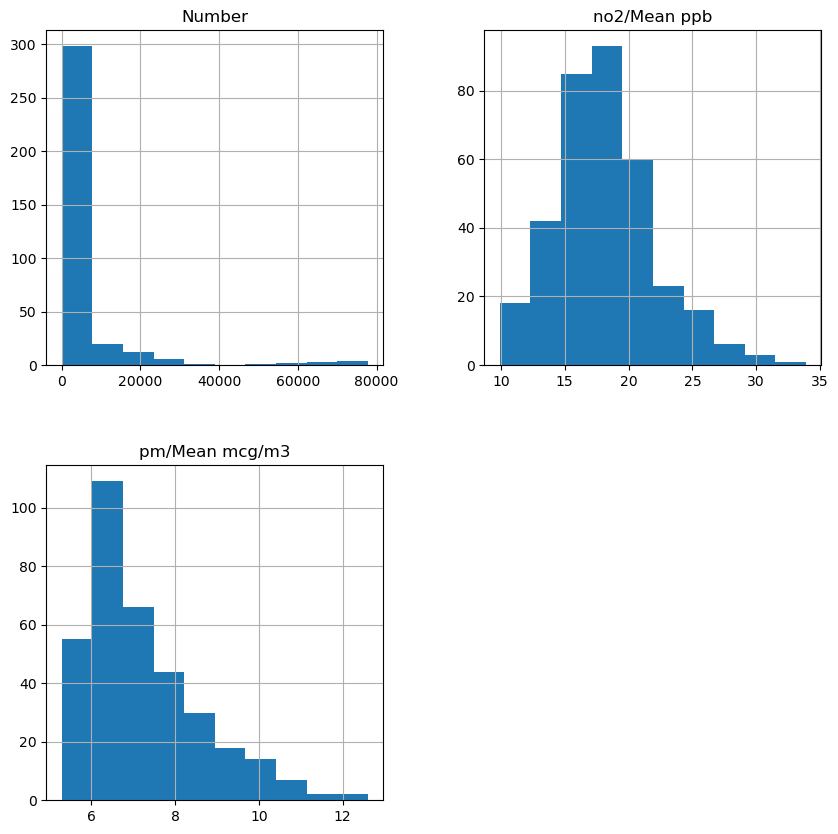

In [7]:
# Making a histogram for each variable in df

axes= df1_subset.hist(bins=10,figsize=(10,10))

Based on the above plots the distribution of number of adult(Number) is highly skewed to the right,indicating that there are many low values and fewer high values.The presence of high-frequency values at specific points may indicate certain thresholds or events that cause spikes.

For"no2/Mean ppb", the distribution appears to be more symmetric but PM2.5 the distribution is skewed to the right but less so than the Number variable.

### **1.4.2.DF2(aag4_no_pm)**

In [8]:
# make a subset of df and drop unnecessary columns

# List of columns you want to exclude
columns_to_exclude= ['Year','GeoID','Geography','GeoType']

# Select columns that are not in the exclusion list
df2_subset= df2_subset = df2.loc[:, ~df2.columns.isin(columns_to_exclude)]


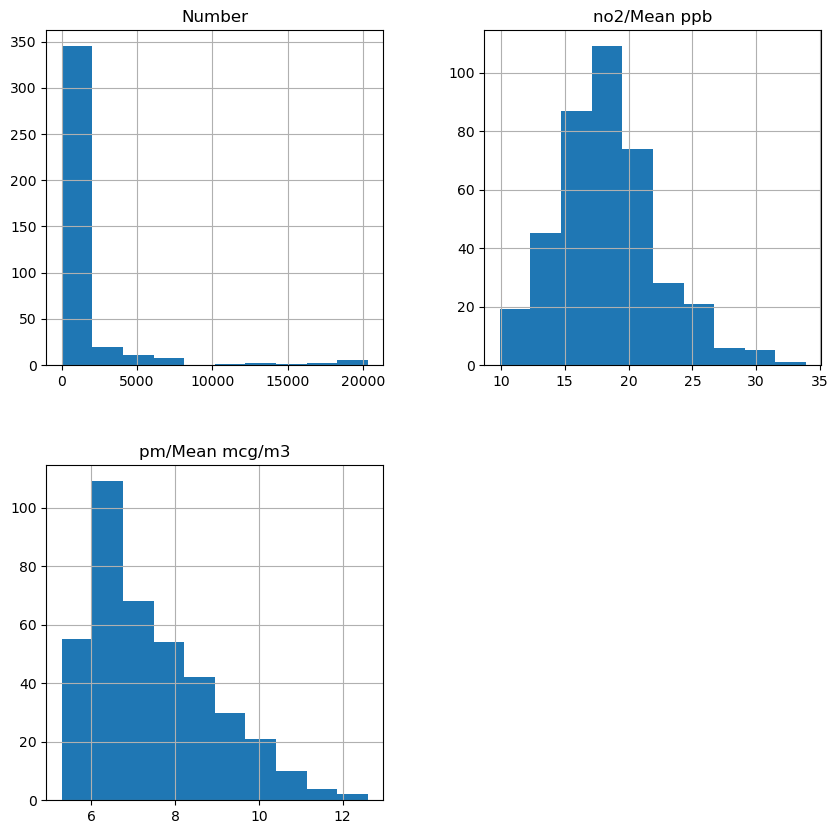

In [9]:
# Making a histogram for each variable in df

axes= df2_subset.hist(bins=10,figsize=(10,10))

### **1.4.3.DF3(aa5_17_no_pm)**

In [10]:
# make a subset of df and drop unnecessary columns

# List of columns you want to exclude
columns_to_exclude= ['Year','GeoID','Geography','GeoType']

# Select columns that are not in the exclusion list
df3_subset= df3_subset = df3.loc[:, ~df3.columns.isin(columns_to_exclude)]


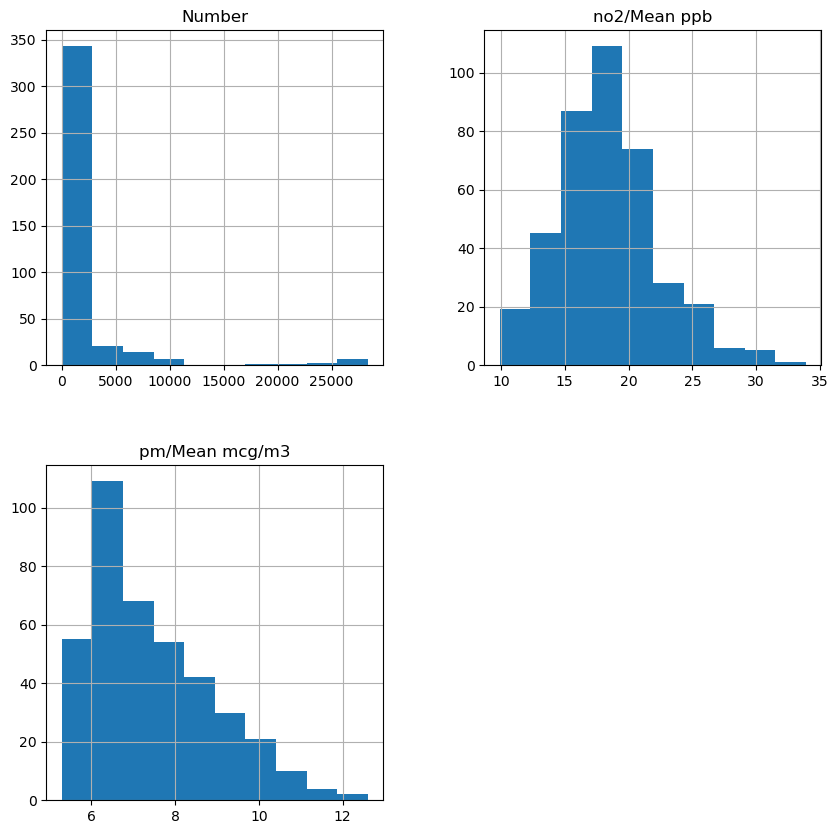

In [11]:
# Making a histogram for each variable in df

axes= df3_subset.hist(bins=10,figsize=(10,10))

### **1.5.Explore data relationships** 

In this section we can call the .corr() method on our data to look at all the correlations between our variables.

In [12]:
# Call the .corr() method on the dataset 

df1[['Number','no2/Mean ppb','pm/Mean mcg/m3']].corr()

,Number,no2/Mean ppb,pm/Mean mcg/m3
Number,1.000000,0.162384,0.342829
no2/Mean ppb,0.162384,1.000000,0.846582
pm/Mean mcg/m3,0.342829,0.846582,1.000000


 Plotting the pairwise relationships in the dataset, to check out how our variables relate to one another.

/Users/marzieh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/marzieh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/marzieh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


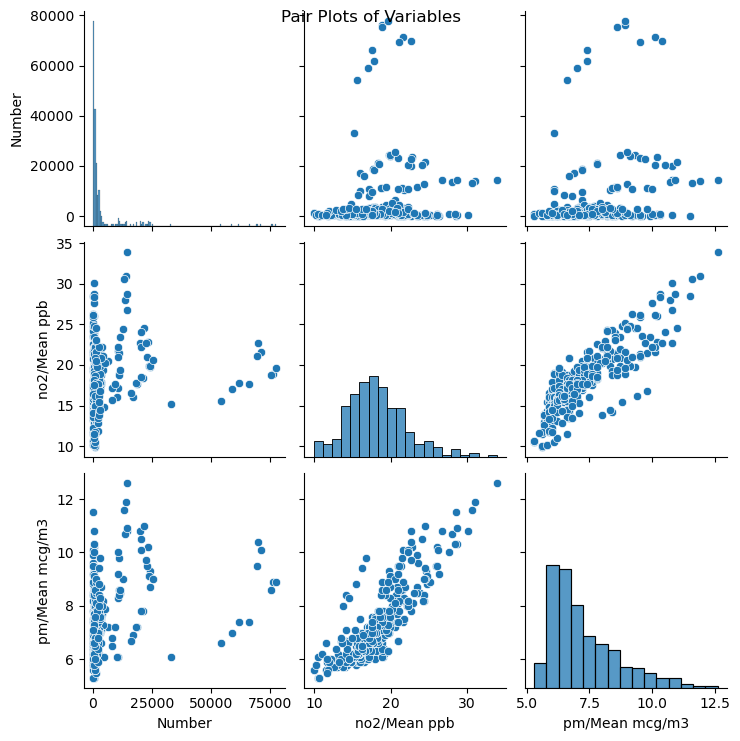

In [13]:
sns.pairplot(df1_subset)
plt.suptitle('Pair Plots of Variables')
plt.show()

In [14]:
# Call the .corr() method on the dataset 
df2[['Number','no2/Mean ppb','pm/Mean mcg/m3']].corr()

,Number,no2/Mean ppb,pm/Mean mcg/m3
Number,1.000000,0.143887,0.306517
no2/Mean ppb,0.143887,1.000000,0.838674
pm/Mean mcg/m3,0.306517,0.838674,1.000000


/Users/marzieh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/marzieh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/marzieh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


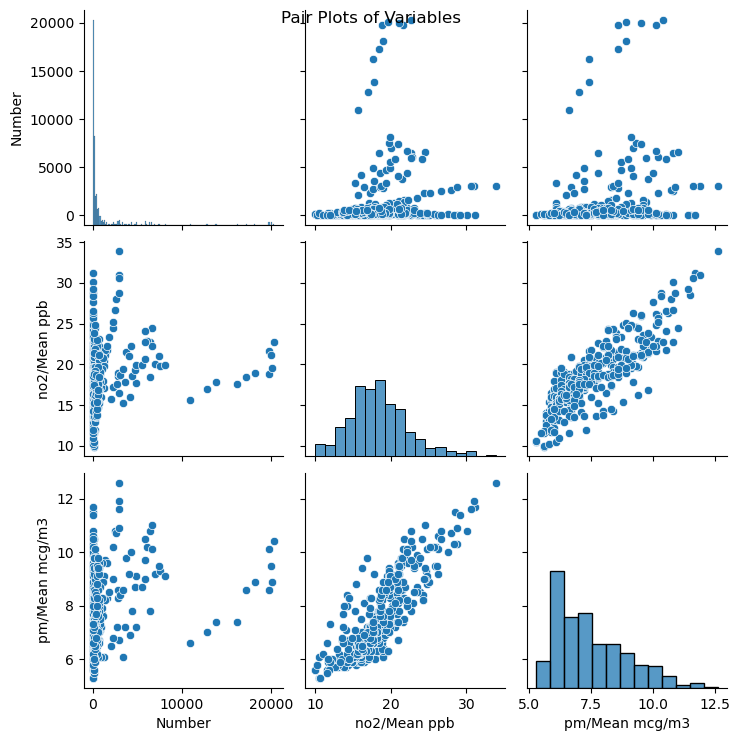

In [15]:
sns.pairplot(df2_subset)
plt.suptitle("Pair Plots of Variables")
plt.show()

In [16]:
# Call the .corr() method on the dataset 
df3[['Number','no2/Mean ppb','pm/Mean mcg/m3']].corr()

,Number,no2/Mean ppb,pm/Mean mcg/m3
Number,1.000000,0.131468,0.284141
no2/Mean ppb,0.131468,1.000000,0.838674
pm/Mean mcg/m3,0.284141,0.838674,1.000000


### **1.5.1.Visualize Relationships Between Variables**

Let's use a Correlation Matrix to look at the relationships between variables in our dadasets.

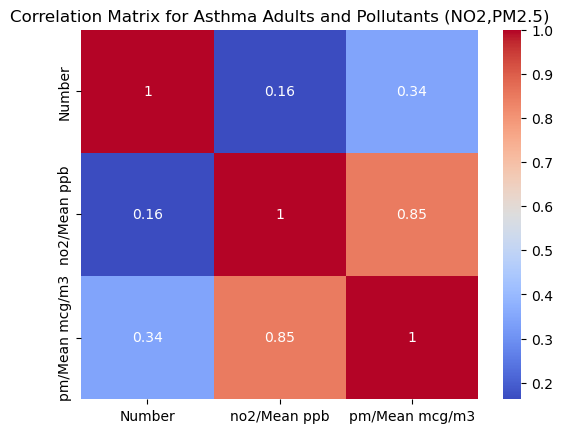

In [17]:
#correlation matrix 1
#Create a correlation heatmap for looking at the correlation of all variables/features for all dfatasets for asthma adults

sns.heatmap(df1_subset.corr(),annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Asthma Adults and Pollutants (NO2,PM2.5)')
plt.show()

The correlation matrix, which contains a subset of only numeric variables, indicates the following notable relationships between variables:

**Strong Correlation**

no2/Mean ppb : pm/Mean mcg/m3 (.84)

**Weak to Moderately Correlation**

Number of adult asthma : no2/Mean ppb (.16)

Number of adult asthma : pm/Mean mcg/m3 (.34)


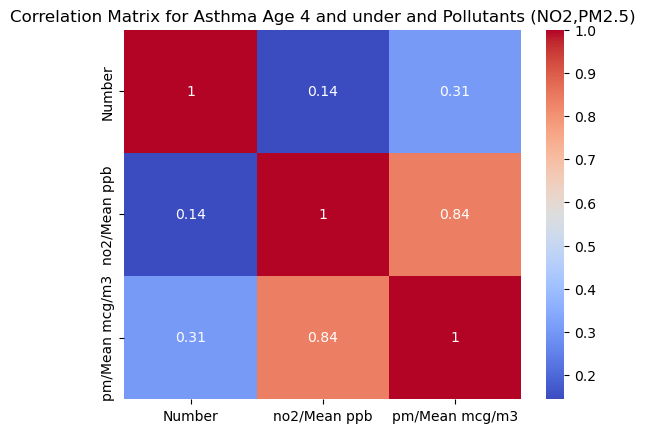

In [18]:
#correlation matrix 2
#Create a correlation heatmap for looking at the correlation of all variables/features for all dfatasets for asthma age4 and under

sns.heatmap(df2_subset.corr(),annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Asthma Age 4 and under and Pollutants (NO2,PM2.5)')
plt.show()

**Strong Correlation**

no2/Mean ppb : pm/Mean mcg/m3 (.84)

**Weak to Moderately Correlation**

Number of adult asthma : no2/Mean ppb (.14)

Number of adult asthma : pm/Mean mcg/m3 (.31)

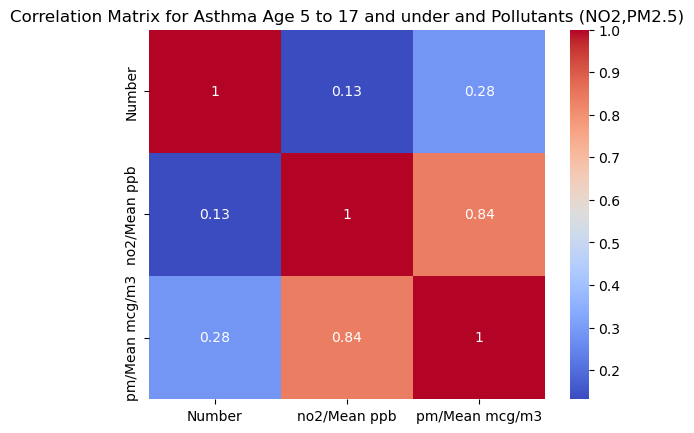

In [19]:
#correlation matrix 3
#Create a correlation heatmap for looking at the correlation of all variables/features for all dfatasets for asthma age 5 to 17 

sns.heatmap(df3_subset.corr(),annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Asthma Age 5 to 17 and under and Pollutants (NO2,PM2.5)')
plt.show()

**Strong Correlation**

no2/Mean ppb : pm/Mean mcg/m3 (.84)

**Weak to Moderately Correlation**

Number of adult asthma : no2/Mean ppb (.13)

Number of adult asthma : pm/Mean mcg/m3 (.28)

### **1.5.2.Conclusion**

Based on the above correlation matrix, all three plots have a same correlation between features. The findings from the EDA analysis of the variables and correlations revealed that the strong positive correlation between the NO2 and PM2.5 pollutant levels.When NO2 levels increase, PM2.5 levels tend to increase as well.

The number of asthma for all three categories(adults,0-4,5-17) indicates a weak positive correlation between them and NO2 levels.A slight increase in adult asthma cases can be observed with increasing NO2 levels, but the correlation is not strong.


The number of asthma for all three categories(adults,0-4,5-17) indicates a moderate positive correlation between them and PM2.5 levels.There is a more noticeable increase in asthma cases with increasing PM2.5 levels compared to NO2 levels.

### **2.Feature Selection and Engineering**

In this section I want to use selectKBest method for feature selection. Before applying feature selection methods like SelectKBest, I should encode categorical features into numeric values. In this project the only column 'GeoType' must be encoded.We are not going to use the other ones in the model.

In [20]:
# Transform categorical columns 

df_transformed= pd.get_dummies(df1,columns=['GeoType'])

# Drop irrelevant columns
df_transformed=df_transformed.drop(columns=['GeoID','Geography'],axis=1)

In [21]:
X= df_transformed.drop(columns=['Number'])
y= df_transformed['Number']

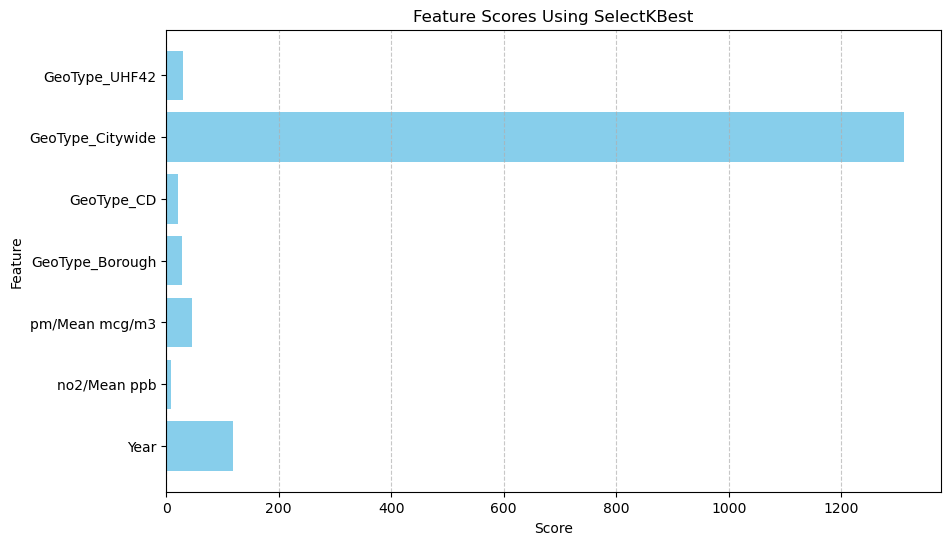

In [22]:
# Select all features to get scores
k_best_selector=  SelectKBest(score_func=f_regression, k='all')

k_best_selector.fit(X,y)

# Get scores for each feature

scores= k_best_selector.scores_

# Plot the feature scores
plt.figure(figsize=(10, 6))
plt.barh(X.columns, scores, color='skyblue')
plt.xlabel('Score')
plt.ylabel('Feature')
plt.title('Feature Scores Using SelectKBest')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()



### **3.Geographic Analysis of Pollutants Levels**

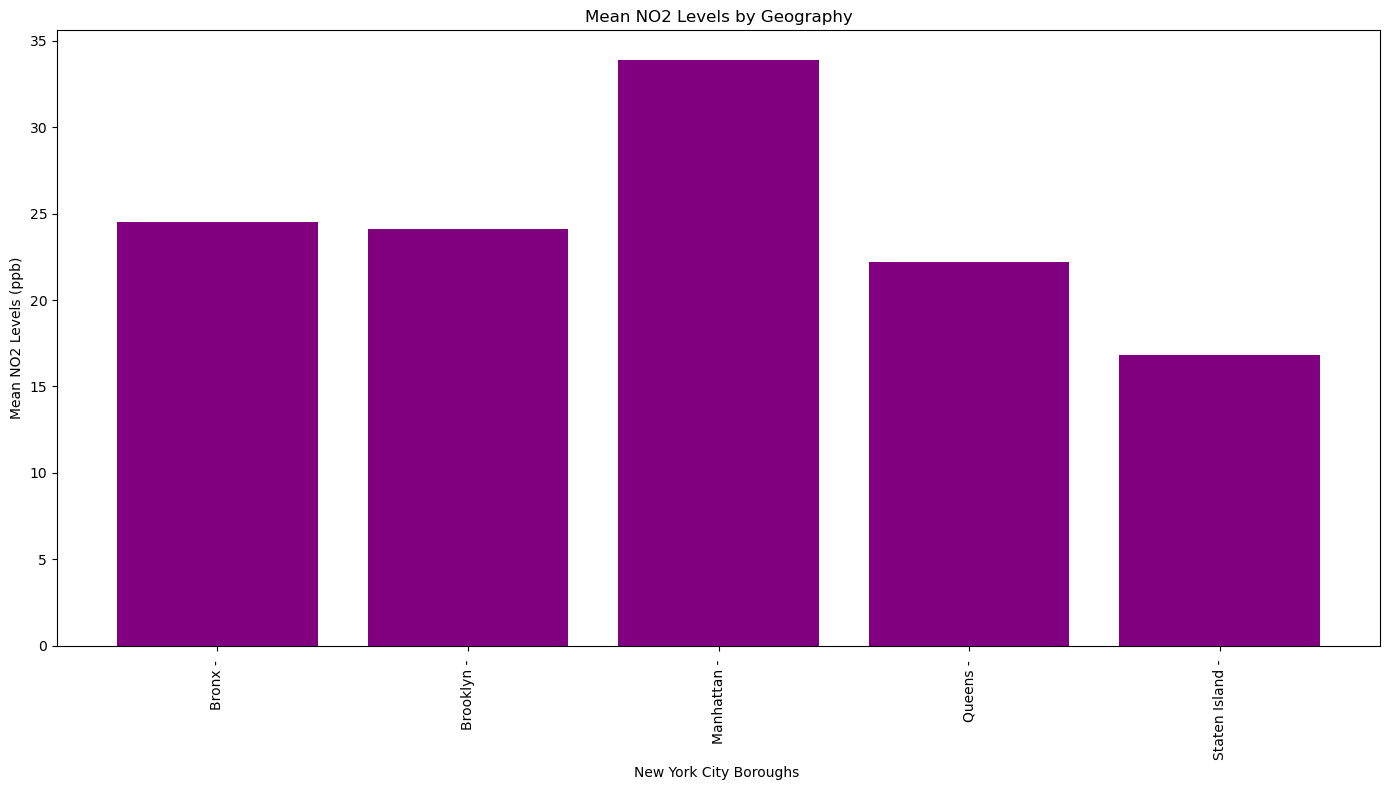

In [23]:
# Filter the DataFrame for GeoID 1, 2, 3, 4, 5

filtered_df = df1[df1['Geography'].isin(['Brooklyn','Manhattan','Queens','Staten Island','Bronx'])]

# Sort the filtered DataFrame by GeoID for better visualization
filtered_df_sorted = filtered_df.sort_values('Geography')

plt.figure(figsize=(14, 8))
plt.bar(filtered_df_sorted['Geography'].astype(str) + " - " , 
        filtered_df_sorted['no2/Mean ppb'], color='purple')
plt.xlabel('New York City Boroughs ')
plt.ylabel('Mean NO2 Levels (ppb)')
plt.title('Mean NO2 Levels by Geography')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()


* The high NO2 levels in Manhattan can be attributed to dense traffic, high population density, and significant commercial activities.


* Bronx and Brooklyn also exhibit elevated NO2 levels, possibly due to similar urban density and traffic patterns.


* Lower NO2 levels in Queens and Staten Island suggest these areas might have less traffic congestion and more open spaces, leading to better air quality.

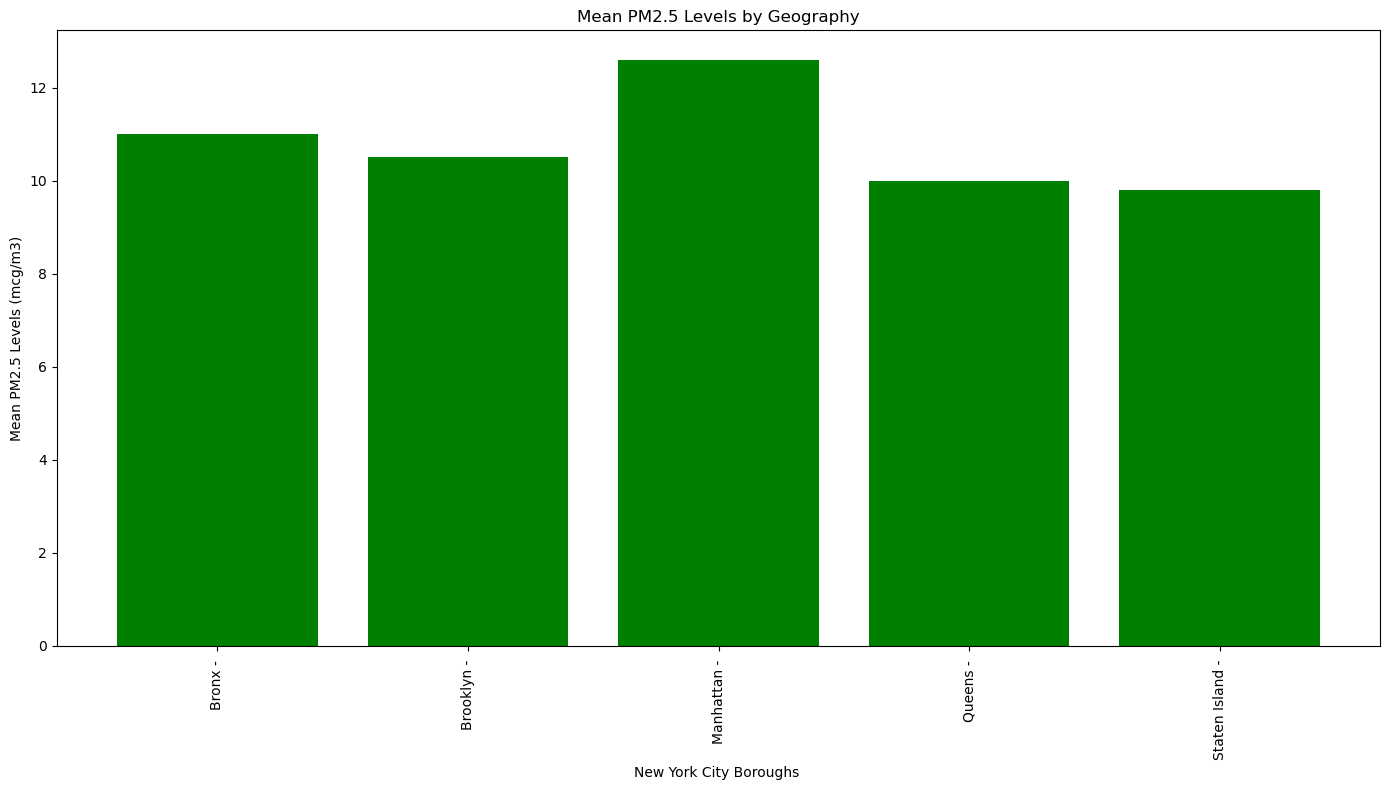

In [24]:
plt.figure(figsize=(14, 8))
plt.bar(filtered_df_sorted['Geography'].astype(str) + " - " , 
        filtered_df_sorted['pm/Mean mcg/m3'], color='green')
plt.xlabel('New York City Boroughs ')
plt.ylabel('Mean PM2.5 Levels (mcg/m3)')
plt.title('Mean PM2.5 Levels by Geography')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()


* The elevated PM2.5 levels in Manhattan could be due to high traffic emissions, construction activities, and other urban sources.

* Similar PM2.5 levels in Bronx, Brooklyn, and Queens might result from comparable urban activities and traffic patterns.

* The lower PM2.5 levels in Staten Island may reflect its lower population density, lesser industrial activities, and greater green spaces.

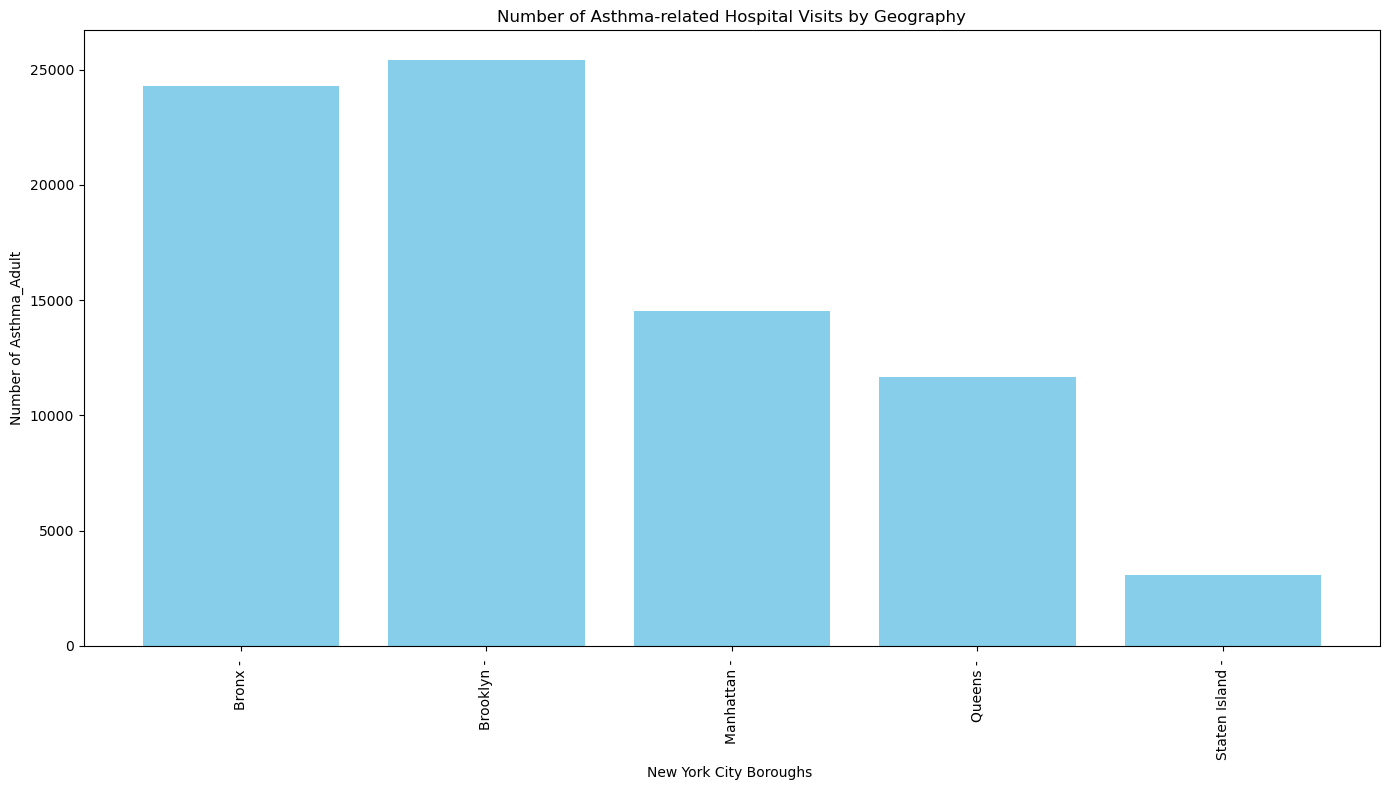

In [25]:
plt.figure(figsize=(14, 8))
plt.bar(filtered_df_sorted['Geography'].astype(str) + " - " , 
        filtered_df_sorted['Number'], color='skyblue')
plt.xlabel('New York City Boroughs ')
plt.ylabel('Number of Asthma_Adult')
plt.title('Number of Asthma-related Hospital Visits by Geography')
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()

* The high number of asthma-related hospital visits in Bronx and Brooklyn suggests a significant impact of air pollution on respiratory health in these areas.

* The moderate number of visits in Manhattan could indicate better healthcare access or different demographic factors influencing hospital visit rates.

* Lower hospital visit numbers in Queens and Staten Island might be due to their better air quality and possibly lower population density.